# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

## Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Business Objective

The dealers wants to understand and predict the used car prices so that they can list cars for better prices to make profit out of selling the used cars.

### Assess Situation
To help the dealers to predict the prices we need a dataset of the vehicles sold previously. The assumptions are that this dataset will be helpful in predicting the prices as it will have valuable informations to do this task.

### Data Science Goals
The data science team should use the data provided and understand how the data is, build models, train the with the dataset and provide these artifacts to business teams to help them predict prices.

### Project Plan
Here are the stages of the plan
1. Understand the data
2. Prepare the data for modeling
3. Build models
4. Evaluate the models
5. Deploy them so that these can be used by business teams

## Data Understanding

### Initial Data

We have a dataset of [vehicles](data/vehicles.csv) sold from a dealership. Lets load the dataset using pandas.

In [1]:
import math

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

In [2]:
cars = pd.read_csv(filepath_or_buffer='./data/vehicles.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

### Describe Data
Lets check whats the dataset contains like what features it has and how it can be helpful for model building

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

This dataset has 17 features(columns) in which 'id' column is not going to be helpful so we can remove this.

It has 426K records.

### Explore The Data
Lets create some plots to understand the data and the story it tells.

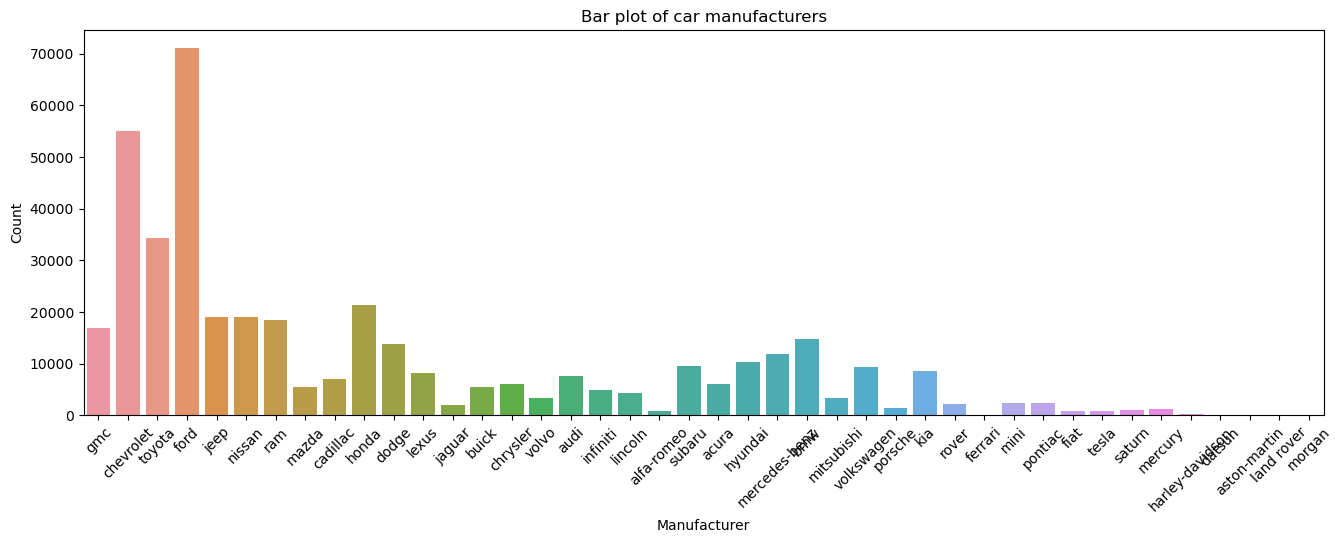

In [4]:
plt.figure(figsize=(16, 5))  # Adjust the width and height as needed
sns.countplot(data=cars, x='manufacturer').set(title='Bar plot of car manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The above plot tells that ford, chevy and toyota cars most sold than any other models.

fuel
diesel       30062
electric      1698
gas         356209
hybrid        5170
other        30728
dtype: int64


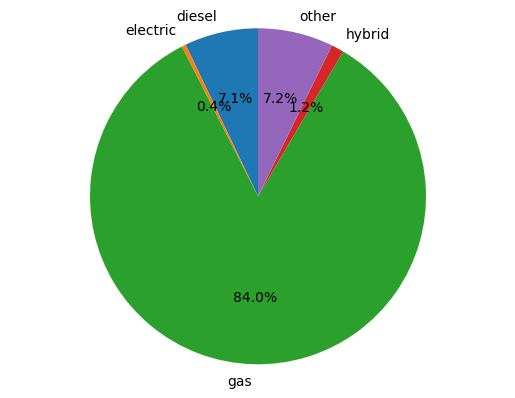

['diesel', 'electric', 'gas', 'hybrid', 'other']


In [5]:
data = cars.groupby('fuel').size()
print(data)
labels=['diesel','electric', 'gas', 'hybrid', 'other']
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()
print(labels)

This plot tells that there are many cars sold are gas fueled cars.

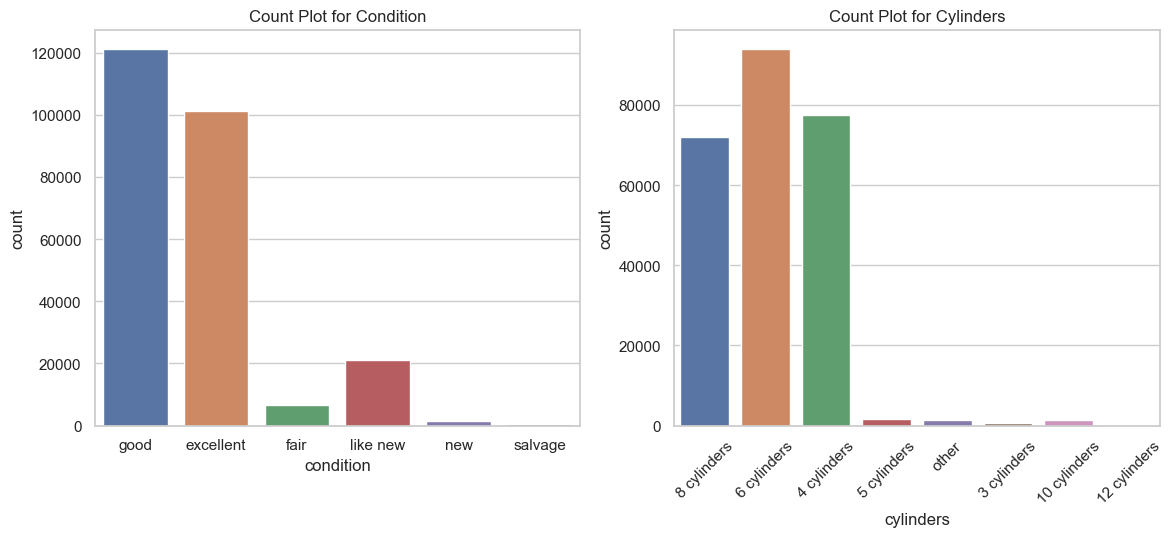

In [6]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='condition', data=cars, ax=axes[0])
axes[0].set_title('Count Plot for Condition')
sns.countplot(x='cylinders', data=cars, ax=axes[1])
axes[1].set_title('Count Plot for Cylinders')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

The above plots tells that cars with good and excellent condition and 4 & 6 cylinders vehicles sold which means that if dealers have higher inventory in these categories they might make more sales and more profits.

In [7]:
unique_categories = cars['drive'].unique()
fig = px.pie(cars.dropna(), names='drive', title='Pie Chart of Car Drive')
fig.update_layout(
    legend_title_text='Drive',
    legend_traceorder='reversed',
    legend=dict(title=dict(text='Categories'))
)
fig.show()

It seems like all drive types are sold more or less equally so drive of the car is not going to impact the sales much.

#### Basic Data Cleansing by eliminating id column and duplicates

The ID column provided in the data set doesn't add value to our use case here. Hence, we are deleting the ID column. 

Also, there are about 56202 duplicate rows in the data as can be seen below. It is imperative that we delete the duplicate data in order for our model to predict accurately. 

In [4]:
print("Number of rows in original dataset: ", len(cars))
cars.drop('id', inplace=True, axis=1)
print("Number of duplicates:", len(cars[cars.duplicated()]))
cars = cars.drop_duplicates()
print("Number of rows remaining after removing duplicates", len(cars))

Number of rows in original dataset:  426880
Number of duplicates: 56202
Number of rows remaining after removing duplicates 370678


#### Identify the number of null values in each feature.

In [5]:
cars.isnull().sum()

region               0
price                0
year               987
manufacturer     15228
model             4685
condition       141281
cylinders       150758
fuel              2468
odometer          3489
title_status      6772
transmission      2069
VIN             143069
drive           112507
size            264889
type             78893
paint_color     108819
state                0
dtype: int64

**Null Value Observation and probably steps to handle them** 

The number of nulls in the data can be seen from the above table.
There are some features with too many null values and there are few features with only a few null values. There are two things we can do with those null values.
1. Eliminate them completely, hoping it wouldn't impact our modeling as much and/or
2. Impute them with appropriate values using various techniques and libraries.

**Showing Null values graphically.**

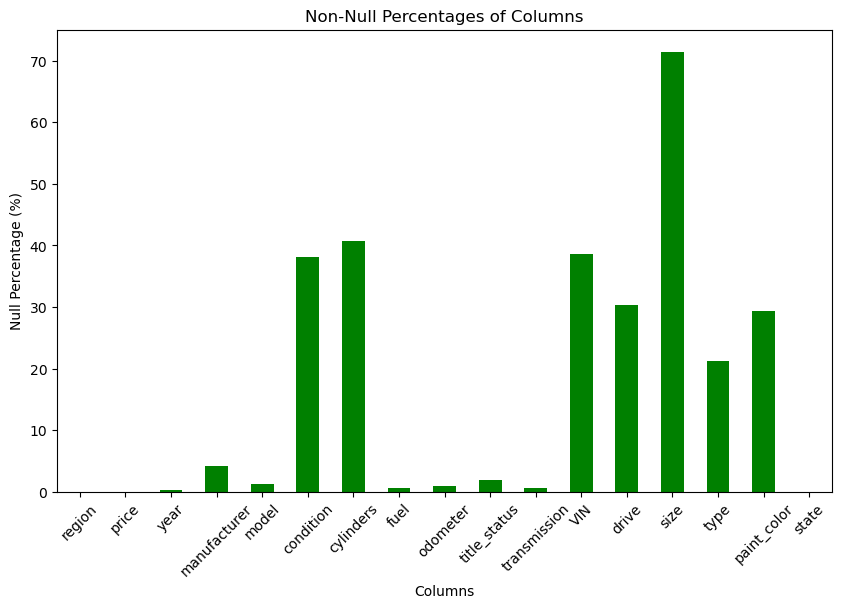

In [6]:
# Calculate the percentage of non-null values for each column
null_percentages = (cars.isnull().mean()) * 100

# Create a bar chart for non-null percentages
null_percentages.plot(kind='bar', rot=0, figsize=(10, 6), color='green')
plt.title('Non-Null Percentages of Columns')
plt.xlabel('Columns')
plt.ylabel('Null Percentage (%)')
plt.xticks(rotation=45)
plt.show()

**Categorical Columns Observation**
Below are the categorical columns of interest that are present in the data set and their unique values. 

In [7]:
interestedCols =['manufacturer', 'condition', 'cylinders', 'title_status', 'transmission', 'fuel', 'drive', 'size', 'type', 'paint_color'] 
for column in interestedCols:
    unique_values = cars[column].unique()
    print(f"Unique values in {column}:\n{unique_values}")
    print('\n')

Unique values in manufacturer:
[nan 'gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' 'acura' 'hyundai'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'rover'
 'ferrari' 'mini' 'pontiac' 'fiat' 'tesla' 'saturn' 'mercury'
 'harley-davidson' 'datsun' 'aston-martin' 'land rover' 'morgan']


Unique values in condition:
[nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']


Unique values in cylinders:
[nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders']


Unique values in title_status:
[nan 'clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']


Unique values in transmission:
[nan 'other' 'automatic' 'manual']


Unique values in fuel:
[nan 'gas' 'other' 'diesel' 'hybrid' 'electric']


Unique values in drive:
[nan 'rwd' '4wd' 'fwd']


Unique values in size:
[nan 'full

**More plots to understand data**

The above graph shows the dataset has a lot of used cars compared to new or salvage cars. Since the objective is to find used car prices, new and salvage cars data could be filtered out. 

<Figure size 1600x1000 with 0 Axes>

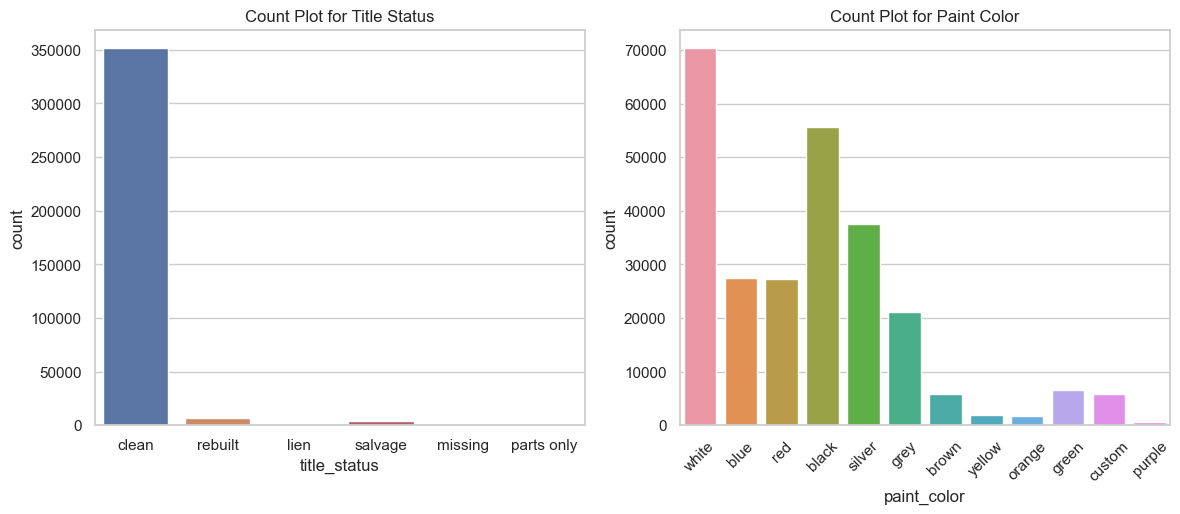

In [10]:
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='title_status', data=cars, ax=axes[0])
axes[0].set_title('Count Plot for Title Status')
sns.countplot(x='paint_color', data=cars, ax=axes[1])
axes[1].set_title('Count Plot for Paint Color')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

The data shows that majority of the cars are gas fueled. with this data, predictions of car prices of electric, diesel and hybrid is not going to be accurate because the model will be biased towards gas. 

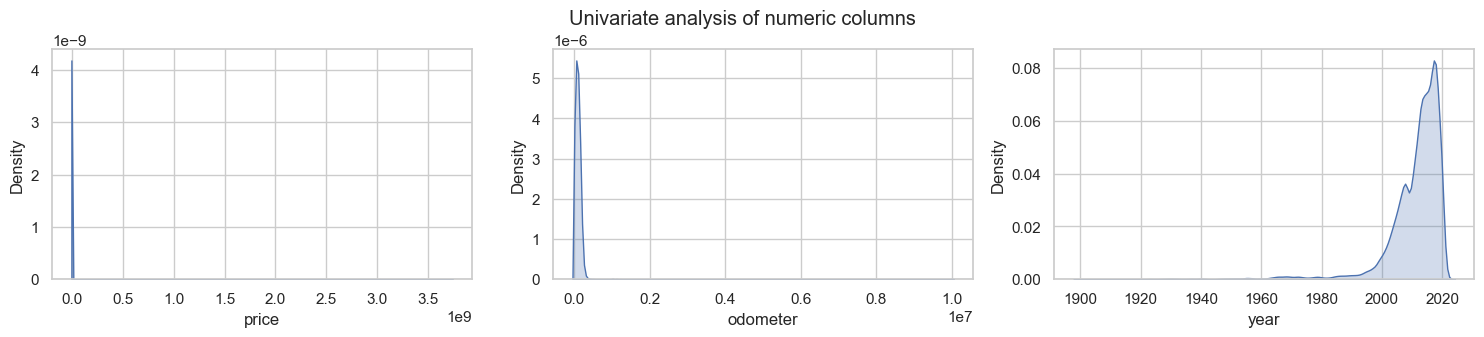

In [13]:
# Univariate analysis of numeric columns
numericCols = ['price', 'odometer', 'year']
plt.figure(figsize=(15, 15))
plt.suptitle("Univariate analysis of numeric columns")
for col in range(len(numericCols)):
    plt.subplot(5,3,col+1)
    sns.kdeplot(x = cars[numericCols[col]], shade=True)
    plt.xlabel(numericCols[col])
    plt.tight_layout()


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

**VIN number of a vehicle doesn't help predict the price of the car. Hence, we can get rid of the vin column.**

In [14]:
cars.drop('VIN', inplace = True, axis=1)

A column with more than 70% of the null values also doesn't help in determining the price. Hence, eliminating the column size.

In [15]:
cars.drop('size', inplace=True, axis=1)

#### Outlier determination and elimination

<Axes: >

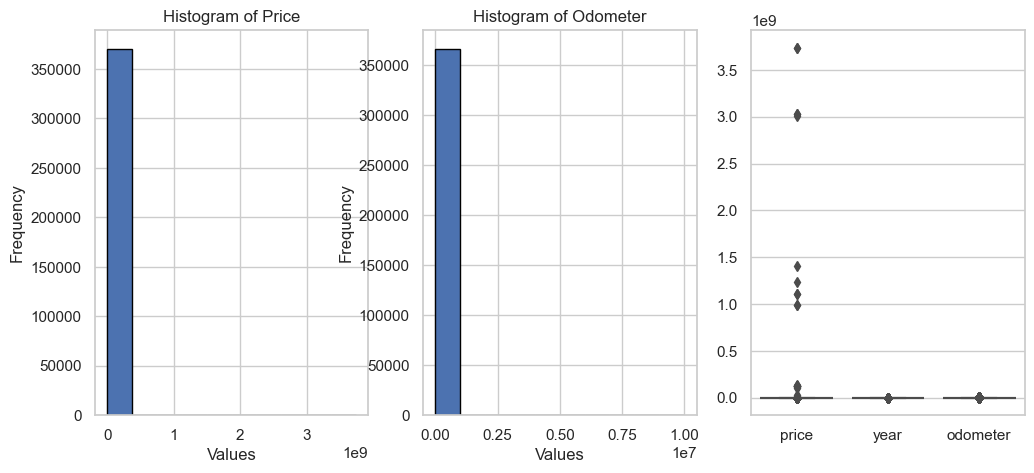

In [16]:
carsOriginal = cars # Just assigning to a new variable so that cleaned data doesn't affect these graphs later on.
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,5))
carsOriginal['price'].hist(ax=axes[0], bins=10, edgecolor='black')
axes[0].set_title('Histogram of Price')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')
carsOriginal['odometer'].hist(ax=axes[1], bins=10, edgecolor='black')
axes[1].set_title('Histogram of Odometer')
axes[1].set_xlabel('Values')
axes[1].set_ylabel('Frequency')
sns.boxplot(data=cars)

The histograms definitely show that there are lot of outliers in price and odometer. Since these two are the only non- categorical features, we care about outliers in only these two columns. The next step eliminates the outliers from those two features. 

In [17]:
def eliminateoutliers(col, dataset):
    df=dataset[[col]]
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Calculate the IQR for each column
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Detect outliers using IQR for each column
    outliers_iqr = ((df < lower_bound) | (df > upper_bound)).any(axis=1)
    return dataset[~outliers_iqr]

In [18]:
print("Total cars before outlier removal:", len(cars))
cars = eliminateoutliers('price', cars)
print("Total cars after removing price outliers", len(cars))
cars = eliminateoutliers('odometer', cars)
print("Total cars after removing odometer outliers", len(cars))

Total cars before outlier removal: 370678
Total cars after removing price outliers 363843
Total cars after removing odometer outliers 360155


<Axes: >

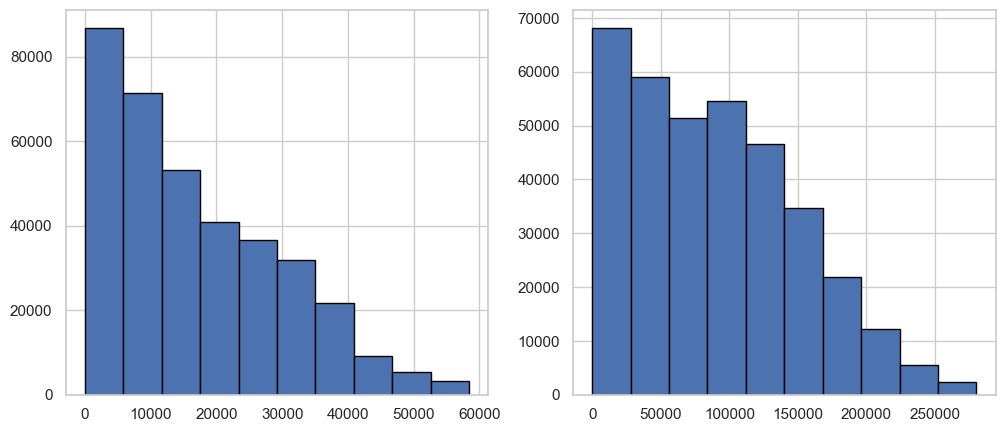

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
cars['price'].hist(ax=axes[0], bins=10, edgecolor='black')
cars['odometer'].hist(ax=axes[1], bins=10, edgecolor='black')

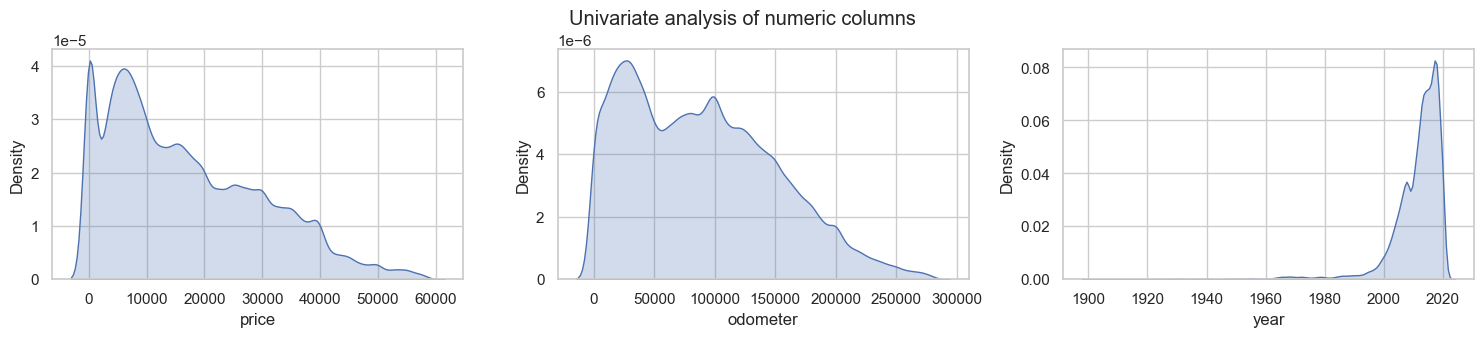

In [20]:
numericCols = ['price', 'odometer', 'year']
plt.figure(figsize=(15, 15))
plt.suptitle("Univariate analysis of numeric columns")
for col in range(len(numericCols)):
    plt.subplot(5,3,col+1)
    sns.kdeplot(x = cars[numericCols[col]], shade=True)
    plt.xlabel(numericCols[col])
    plt.tight_layout()

#### Observations after outlier removal

After eliminating the outliers from the dataset, there is a significant difference in the histograms of price and odometers and the KDE plots also show that the data is somewhat evenly distributed compared to before removing outlers.

#### Null Handling

We noticed before that there are some columns with very few nulls. we are dropping those columns altogether. But for other columns where we have significant nulls, we can replace them with most frequently occurring value. 

In [21]:
cars.isnull().sum()

region               0
price                0
year               828
manufacturer     13662
model             4249
condition       135662
cylinders       146059
fuel              2424
odometer          3413
title_status      6604
transmission      2004
drive           109407
type             75788
paint_color     105384
state                0
dtype: int64

In [22]:
# cars = cars.dropna()
# used_cars_clean.head()
# cars.drop_duplicates(inplace=True)
# cars = cars.reset_index().drop(columns=['index'])
# cars['age'] = 2022 - cars.year.astype(int)
# cars.year = cars.year.astype(int).astype(str)
# cars = cars.drop(columns=['year'])
# cars.drop(cars.query("price== 0").index, inplace=True)
# cars.isnull().sum()

In [23]:
# print(len(cars))

In [24]:
specific_column = 'year'
cars = cars.dropna(subset=[specific_column])
specific_column = 'transmission'
cars = cars.dropna(subset=[specific_column])
specific_column = 'fuel'
cars = cars.dropna(subset=[specific_column])
specific_column = 'model'
cars = cars.dropna(subset=[specific_column])

In [25]:
# for Odometer, we can take mean of odometer values to fill in the null value. 
cars['odometer'].fillna(math.ceil(np.mean(cars['odometer'])), inplace=True)

In [26]:
cars['condition'].fillna("good", inplace=True)
cars['manufacturer'].fillna('ford', inplace=True)
cars['cylinders'].fillna('6 cylinders', inplace=True)
cars['fuel'].fillna('gas', inplace=True)
cars['title_status'].fillna('clean', inplace=True)
cars['drive'].fillna('4wd', inplace=True)
cars['type'].fillna('sedan', inplace=True)
cars['paint_color'].fillna('white', inplace=True)

In [27]:
cars.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

**Null Handling Observation**
After removing the null values, it can be seen above that there are no more null values in the total data set, and also we don't have a significant loss of data as we imputed some columns with some other data. 

**More Graphs for observing correlations**
1. Price Vs Condition
2. Price Vs Year
3. Price Vs Cylinders 

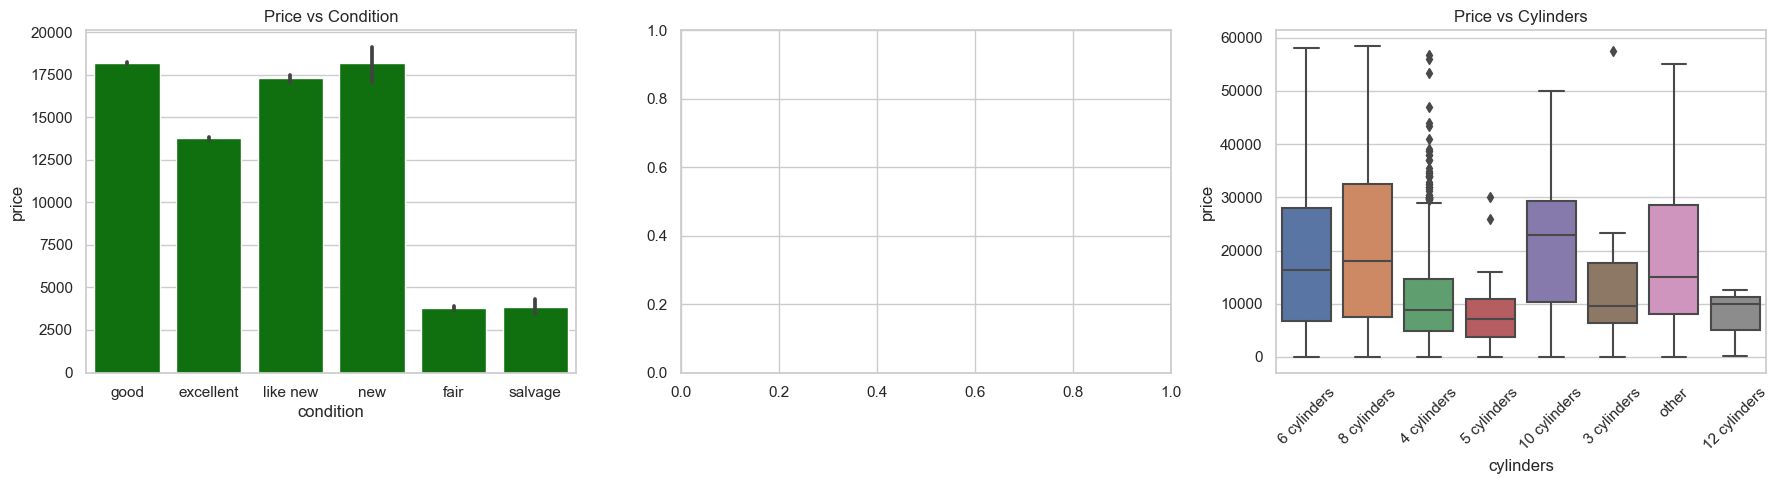

In [28]:
df_sorted = cars.sort_values(by='price')
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.barplot(x=df_sorted['condition'], y=df_sorted['price'], data=df_sorted.sample(10000), ax=axes[0], color='green')
axes[0].set_title('Price vs Condition')
# sns.scatterplot(x='year', y='price', data=cars.sample(10000), ax=axes[1], color='blue')
# axes[1].set_title('Price vs Year')
sns.boxplot(x='cylinders', y='price', data=cars.sample(10000), ax=axes[2])
axes[2].set_title('Price vs Cylinders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observations from above graph**

When taken a sample size of 10000, we can observe that the price of car is somewhat correlatable to condition and year i.e. newer vehicles, like new vehiles and good conditioned vehicles are higher priced than fair and salvage vehicles as expected. 

**Convert Non-numeric data to numeric data using Label Encoding**
Non-numeric data such as cylinders, region, manufacturer, model etc. cannot be used to find correlation or to plot pair plots. Hence, we need to convert the data into numeric data. Two ways of doing that are using: 
1. Label Encoding
2. One Hot Encoding

I chose Label Encoding because one hot encoding creates a lot more features to work with. Owing to the size of data and systems we are using, Label encoding is my preferred way. 

In [29]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
cars_numeric_labels = cars.apply(labelEncoder.fit_transform)

In [30]:
cars_numeric_labels.sample(15)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
380517,300,9483,104,4,26710,2,5,2,16519,0,2,2,7,0,43
288924,58,8545,99,13,14076,2,6,2,28417,0,2,0,8,10,35
382897,303,2138,99,16,9766,2,5,2,57462,0,0,0,9,10,43
190623,388,8195,104,18,20717,2,5,4,9461,0,2,2,4,10,19
221012,180,12550,106,30,2780,2,5,2,3188,0,2,2,3,10,24
382078,300,10501,103,30,15202,2,5,2,11616,0,0,0,8,10,43
238092,131,1539,94,38,22414,2,5,2,83880,0,0,0,9,10,27
49767,286,14181,101,33,1825,2,5,4,32232,0,0,0,8,10,4
228908,218,4823,102,13,12610,2,5,2,69772,0,0,0,0,0,26
56902,301,8360,105,38,20984,2,3,2,21528,0,0,1,0,10,4


In [31]:
# labelEncoder.inverse_transform([14]) # here since label encoder is only persisting the last column, inverse transforming will return the state name for the encoded value. 

**Encoding Notes**
After using Label Encoding from SK Learn, we could see that all the above data is now transformed into numeric data. 

#### Correlation Matrix and Heat maps


In [32]:
print(cars_numeric_labels.info())

<class 'pandas.core.frame.DataFrame'>
Index: 351547 entries, 27 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   region        351547 non-null  int64
 1   price         351547 non-null  int64
 2   year          351547 non-null  int64
 3   manufacturer  351547 non-null  int64
 4   model         351547 non-null  int64
 5   condition     351547 non-null  int64
 6   cylinders     351547 non-null  int64
 7   fuel          351547 non-null  int64
 8   odometer      351547 non-null  int64
 9   title_status  351547 non-null  int64
 10  transmission  351547 non-null  int64
 11  drive         351547 non-null  int64
 12  type          351547 non-null  int64
 13  paint_color   351547 non-null  int64
 14  state         351547 non-null  int64
dtypes: int64(15)
memory usage: 42.9 MB
None


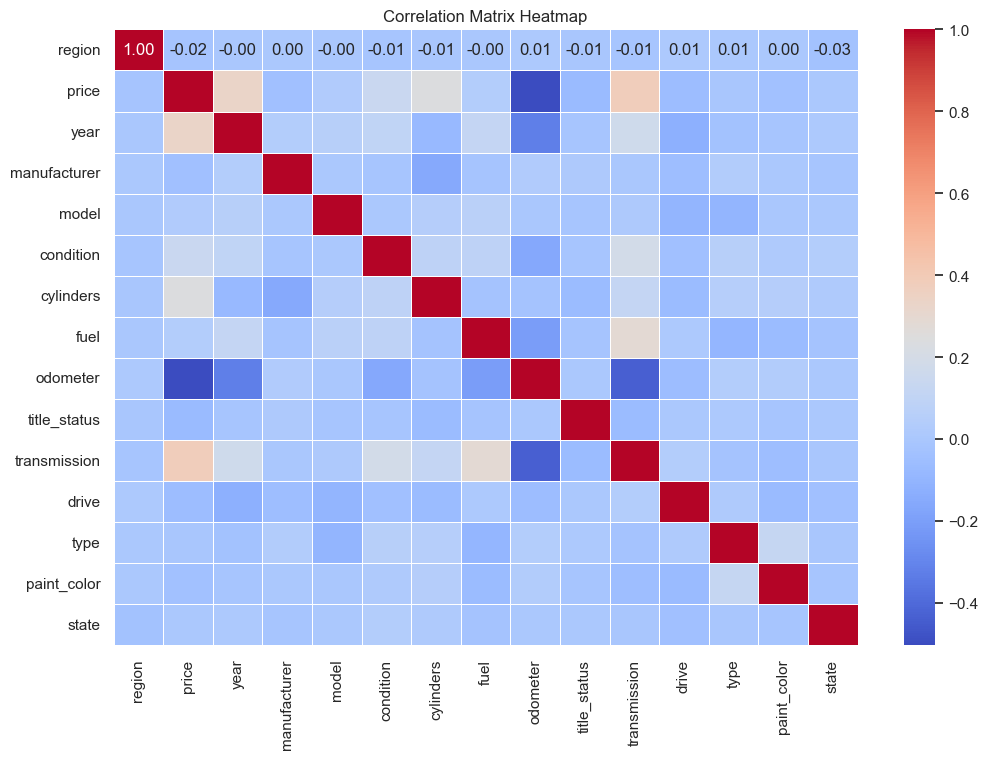

In [33]:
correlation_matrix = cars_numeric_labels.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

**Correlation Matrix Notes:**
From the above matrix, we can observe that the odometer, transmission and year have higher correlation to price compared to other features as expected. 

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [34]:
modelPerformance={}

In [35]:

X = cars_numeric_labels.drop('price', axis=1) # dropping price since that is our target.
y = cars_numeric_labels['price'] # Setting prices as target.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linReg = LinearRegression().fit(X_train, y_train)

print("score =", linReg.score(X_test, y_test)) # this is the base performance of the existing data set.
print("mse = ", mean_squared_error(y_test, linReg.predict(X_test)))


score = 0.38111510508275737
mse =  10899923.43325228


In [36]:
stdScalar = StandardScaler()
scaledData = stdScalar.fit_transform(cars_numeric_labels)
scaledData

array([[-1.5103583 ,  1.35017739,  0.29574286, ...,  0.36061936,
         0.77215337, -1.50413036],
       [-1.5103583 ,  0.61182424, -0.13473237, ...,  0.36061936,
        -1.47664911, -1.50413036],
       [-1.5103583 ,  1.62262804,  0.94145571, ...,  0.36061936,
         0.27241948, -1.50413036],
       ...,
       [ 1.72883113,  1.4396459 ,  0.94145571, ..., -0.71009443,
         0.77215337,  1.74281892],
       [ 1.72883113,  1.0898621 ,  0.7262181 , ...,  0.62829781,
         0.52228643,  1.74281892],
       [ 1.72883113,  1.18361368,  0.8338369 , ..., -0.97777288,
         0.77215337,  1.74281892]])

#### PCA Analysis
PCA Analysis with 3 components

In [37]:
pca = PCA(n_components = 3)
pca.fit(scaledData)

PCA(n_components=3)

In [38]:
X_pcaTrain = pca.transform(scaledData)
print(X_pcaTrain.shape)

(351547, 3)


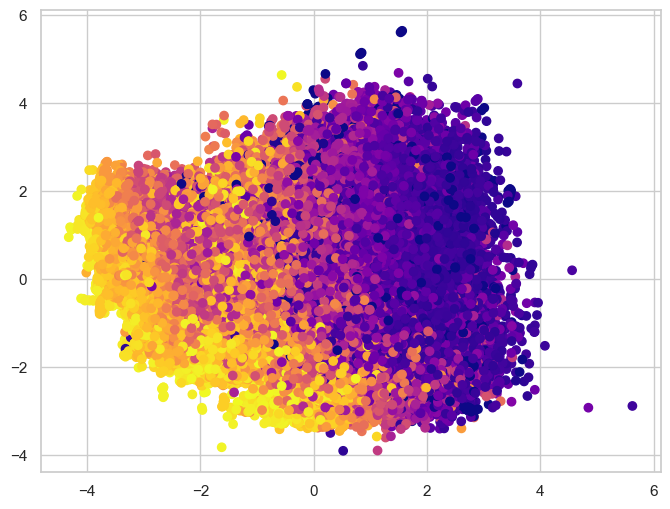

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(X_pcaTrain[:,0], X_pcaTrain[:, 1], c=cars_numeric_labels['price'], cmap='plasma')


In [40]:
X = X_pcaTrain
y = cars_numeric_labels['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linReg = LinearRegression().fit(X_train, y_train)
lrpcaScore = linReg.score(X_test, y_test)
modelPerformance["LRPCA"]= lrpcaScore
print(modelPerformance)

{'LRPCA': 0.6037419859904197}


In [41]:
# Pipeine for Linear Regression
pipe = Pipeline([
    ('pca', PCA()),
    ('linearRegression', LinearRegression())
])
params = {
    'pca__n_components' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]    
}

grid = GridSearchCV(pipe, param_grid=params).fit(X_train, y_train)
print(grid.best_estimator_)
print(grid.best_score_)


Pipeline(steps=[('pca', PCA(n_components=3)),
                ('linearRegression', LinearRegression())])
0.6053055482191383


In [42]:
# finding the score on test data.

test_preds = grid.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds)
print(f'Test MSE: {test_mse}')
print(grid.score(X_test, y_test))

Test MSE: 6978974.681704901
0.6037419859904197


**Observations of PCA Analysis**
Compared to base data without standard scalar applied, the Linear regression performed on a PCA data results in a better score.

In [43]:
# Kmeans on PCA Data.
pipe = Pipeline([
    ('kmeans', KMeans()),
    ('linearRegression', LinearRegression())
])
params = {
    'kmeans__n_clusters' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}
grid = GridSearchCV(pipe, param_grid=params).fit(X_train, y_train)
print(grid.best_estimator_)
kmlregScore = grid.best_score_
modelPerformance["KMLRPCA"]= kmlregScore
print(modelPerformance)



Pipeline(steps=[('kmeans', KMeans(n_clusters=10)),
                ('linearRegression', LinearRegression())])
{'LRPCA': 0.6037419859904197, 'KMLRPCA': 0.6543237885241585}


In [44]:
# Original Data
X = cars_numeric_labels.drop('price', axis=1) # dropping price since that is our target.
y = cars_numeric_labels['price'] # Setting prices as target.
X_trainOriginal, X_testOriginal, y_trainOriginal, y_testOriginal = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# KMeans on actual data
pipe = Pipeline([
    ('kmeans', KMeans()),
    ('linearRegression', LinearRegression())
])
params = {
    'kmeans__n_clusters' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}
grid = GridSearchCV(pipe, param_grid=params).fit(X_trainOriginal, y_trainOriginal)
print(grid.best_estimator_)
kmlrorgScore = grid.best_score_
modelPerformance["KMLRORG"]= kmlrorgScore
print(modelPerformance)

Pipeline(steps=[('kmeans', KMeans(n_clusters=10)),
                ('linearRegression', LinearRegression())])
{'LRPCA': 0.6037419859904197, 'KMLRPCA': 0.6543237885241585, 'KMLRORG': 0.2683290826929394}


In [46]:
# Ridge Regression on PCA Data
pipeRidge = Pipeline([
    ('ridge', Ridge())
])
params_dict = {'ridge__alpha': [0.1, 1.0, 10.0]}
grid = GridSearchCV(pipeRidge, param_grid=params_dict)
grid.fit(X_train, y_train)
print(grid.best_estimator_)
print(grid.best_score_)
ridpcaScore = grid.best_score_
modelPerformance["RIDPCA"]= ridpcaScore

Pipeline(steps=[('ridge', Ridge(alpha=10.0))])
0.6053055485183317


In [47]:
# Ridge Regression on PCA Data
pipeRidge = Pipeline([
    ('ridge', Ridge())
])
params_dict = {'ridge__alpha': [0.1, 1.0, 10.0]}
grid = GridSearchCV(pipeRidge, param_grid=params_dict)
grid.fit(X_trainOriginal, y_trainOriginal)
print(grid.best_estimator_)
print(grid.best_score_)
ridorgScore = grid.best_score_
modelPerformance["RIDORG"]= ridorgScore

Pipeline(steps=[('ridge', Ridge(alpha=10.0))])
0.3834214669891085


In [48]:
# Ridge Regression on PCA Data with KMeans
pipeRidge = Pipeline([
    ('kmeans', KMeans()),
    ('ridge', Ridge())
])
params_dict = {
    'ridge__alpha': [0.1, 1.0, 10.0],
    'kmeans__n_clusters' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}
grid = GridSearchCV(pipeRidge, param_grid=params_dict)
grid.fit(X_train, y_train)
print(grid.best_estimator_)
print(grid.best_score_)
kmridpcaScore = grid.best_score_
modelPerformance["KMRIDPCA"]= kmridpcaScore
print(modelPerformance)

Pipeline(steps=[('kmeans', KMeans(n_clusters=10)), ('ridge', Ridge(alpha=0.1))])
0.6544599896628045
{'LRPCA': 0.6037419859904197, 'KMLRPCA': 0.6543237885241585, 'KMLRORG': 0.2683290826929394, 'RIDPCA': 0.6053055485183317, 'RIDORG': 0.3834214669891085, 'KMRIDPCA': 0.6544599896628045}


**Sequential Feature Selection**

In [49]:
# Sequential feature selection on Original data.
pipeSeq = Pipeline([
    ('seq', SequentialFeatureSelector(estimator=Ridge())), 
    ('linreg', LinearRegression())
])

params_dict = {
    'seq__n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
}
grid = GridSearchCV(pipeSeq, param_grid=params_dict)
grid.fit(X_trainOriginal, y_trainOriginal)
print(grid.best_estimator_)
print(grid.best_score_)
seqorgscore = grid.best_score_
modelPerformance["SEQORG"]= seqorgscore

Pipeline(steps=[('seq',
                 SequentialFeatureSelector(estimator=Ridge(),
                                           n_features_to_select=10)),
                ('linreg', LinearRegression())])
0.3831704727865978


In [50]:
# Sequential feature selection on PCA data.
pipeSeq = Pipeline([
    ('seq', SequentialFeatureSelector(estimator=Ridge())),
    ('linreg', LinearRegression())
])

params_dict = {
    'seq__n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
}
grid = GridSearchCV(pipeSeq, param_grid=params_dict)
grid.fit(X_train, y_train)
print(grid.best_estimator_)
print(grid.best_score_)
seqpcascore = grid.best_score_
modelPerformance["SEQPCA"]= seqpcascore

Pipeline(steps=[('seq',
                 SequentialFeatureSelector(estimator=Ridge(),
                                           n_features_to_select=2)),
                ('linreg', LinearRegression())])
0.6043681229772442


**Polynomial Feature Selection**


In [51]:
# Polynomial feature selection on PCA data.
pipeSeq = Pipeline([
    ('pFeat', PolynomialFeatures()),
    ('linreg', LinearRegression())
])

params_dict = {
    'pFeat__degree':[5]
}
grid = GridSearchCV(pipeSeq, param_grid=params_dict)
grid.fit(X_train, y_train)
print(grid.best_estimator_)
print(grid.best_score_)
plyLRScore = grid.best_score_
modelPerformance["PLYLRPCA"]= plyLRScore

Pipeline(steps=[('pFeat', PolynomialFeatures(degree=5)),
                ('linreg', LinearRegression())])
0.6822116182961864


In [52]:
# Polynomial feature selection on PCA data.
pipeSeq = Pipeline([
    ('pFeat', PolynomialFeatures()),
    ('linreg', Lasso())
])

params_dict = {
    'pFeat__degree':[5]
}
grid = GridSearchCV(pipeSeq, param_grid=params_dict)
grid.fit(X_train, y_train)
print(grid.best_estimator_)
print(grid.best_score_)
plypcaScore = grid.best_score_
modelPerformance["PLYPCALASSO"]= plypcaScore

Pipeline(steps=[('pFeat', PolynomialFeatures(degree=5)), ('linreg', Lasso())])
0.6822186176481273


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

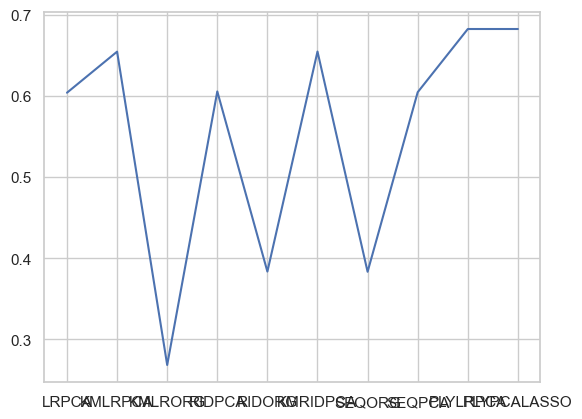

In [57]:
plt.plot(modelPerformance.keys(), modelPerformance.values())

In [68]:
px.line(x=modelPerformance.keys(),y=modelPerformance.values(),title="Performance of various Models").update_layout(
    xaxis_title="Models", yaxis_title="Accuracy in %"
)

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Lets save the model artifacts so that we can deploy this model and will help dealers to fine tune their pricing of the cars.

In [54]:
from joblib import dump

In [55]:
dump(grid.best_estimator_, 'model.joblib')

['model.joblib']

In [56]:
# using one column to predict price using pca analysis.
grid.predict(pca.transform([[-1.510358,1.350177,0.295743,-0.387725,0.968269,0.469124,1.234297,-0.058477,-0.524433,-0.1786,2.085828,-0.739120,0.360619,0.772153,-1.50413]]))

array([11641.73888091])